Nesse IPYNB vamos explorar o Topico de reclamações sobre Atendimento, o que tras um foco grande ao serviço de TV a Cabo, mas afeta todos os serviços

In [1]:
import pandas as pd

df = pd.read_csv("data/05_nlp_classificados_topicos.csv")
df_detratores = df[(df["classificacao"]=="Detrator")]

print(df_detratores.shape)
df_detratores.head(2)

(47, 18)


,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
0,1,João Silva,35,Masculino,SP,Casado,2,2018-05-10,NaN,79.99,Telefonia Móvel,270.0,2.3,2.0,O serviço de internet tem sido instável. Estou...,False,Detrator,internet_connection
2,3,Carlos Oliveira,42,Masculino,MG,Casado,1,2020-01-20,2021-06-30,139.99,Internet,0.0,0.0,1.0,Tive problemas com a fatura deste mês. O valor...,True,Detrator,atendimento


Antes de seguirmos para o topico de antedimento em si, vamos dar uma olhada nos churn em si

In [4]:
df[df['churn']]

,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
2,3,Carlos Oliveira,42,Masculino,MG,Casado,1,2020-01-20,2021-06-30,139.99,Internet,0.0,0.0,1.0,Tive problemas com a fatura deste mês. O valor...,True,Detrator,atendimento
4,5,Paulo Rodrigues,41,Masculino,DF,Divorciado,3,2019-11-12,2022-01-05,99.99,TV a Cabo,0.0,0.0,0.0,O canal de esportes não está funcionando corre...,True,Detrator,other
7,1003,Luiza Rodrigues,39,Feminino,MG,Casado,2,2018-02-20,2022-09-30,149.99,TV a Cabo,0.0,0.0,0.0,Os canais HD têm apresentado problemas de qual...,True,Detrator,other
17,1013,Patrícia Costa,40,Feminino,MG,Divorciado,1,2019-03-20,2023-09-30,139.99,TV a Cabo,0.0,0.0,0.0,A qualidade de imagem da TV a cabo é excelente...,True,Promotor,quality_tv_channels


In [2]:
for comment in df[df['churn']]["comments"].unique():
    print(comment,'\n')

Tive problemas com a fatura deste mês. O valor cobrado está incorreto e não consigo entrar em contato com o atendimento ao cliente. Já enviei diversos emails e tentei ligar várias vezes, mas não obtive resposta. 

O canal de esportes não está funcionando corretamente. A imagem fica pixelada e o áudio está com falhas. Já entrei em contato com o suporte técnico algumas vezes, mas o problema persiste. 

Os canais HD têm apresentado problemas de qualidade. A imagem está pixelada e o som não está sincronizado com a imagem. 

A qualidade de imagem da TV a cabo é excelente. Todos os canais funcionam perfeitamente. 



Temos aqui 50% de comentarios relacionados (ou envolvendo atendimento)\
75% Relacionado com o serviço de TV a Cabo, todos de planos diferentes\
75% de MG

E 25% aponta para churn natural, já que era um cliente era Promotor

In [5]:
df_detrator_atendimento = df_detratores[df_detratores["topic"]=="atendimento"]
for comment in df_detrator_atendimento["comments"].unique():
    print(comment,'\n')

Tive problemas com a fatura deste mês. O valor cobrado está incorreto e não consigo entrar em contato com o atendimento ao cliente. Já enviei diversos emails e tentei ligar várias vezes, mas não obtive resposta. 

Estou profundamente insatisfeita com o serviço de telefonia fixa. As ligações são constantemente interrompidas, e a qualidade do som é péssima. Além disso, o atendimento ao cliente é ineficiente e não resolve meus problemas. Não recomendo essa empresa de forma alguma. 

O serviço de telefonia fixa dessa empresa é um verdadeiro desastre. As ligações são constantemente cortadas, o som é horrível e o atendimento ao cliente é simplesmente inútil. É uma experiência frustrante e não vale o dinheiro investido. 

Estou completamente desapontada com o serviço de TV a cabo dessa empresa. A qualidade dos canais é péssima, a imagem é frequentemente distorcida e o atendimento ao cliente é simplesmente inexistente. Não recomendo a ninguém. 

Estou profundamente decepcionada com o serviço d

Fica claro aqui que na maioria dos casos o atendimento não é o problema central e sim um agravante de outro problema que o cliente vem enfrentando.\
Além disso não é exposto uma caracteristica expecifica em que o atendimento frustra os clientes, ao inves disso é apontado temas genericos

Vamos explorar o relacionamento do TMA e qtd_appointments com o posicionamento de Promotor/Detrator

In [14]:
df[['tma','qtd_appointments','price','classificacao']].groupby('classificacao').median()

,tma,qtd_appointments,price
classificacao,,,
Detrator,84.0,1.0,99.99
Neutro,258.0,1.0,149.99
Promotor,0.0,0.0,119.99


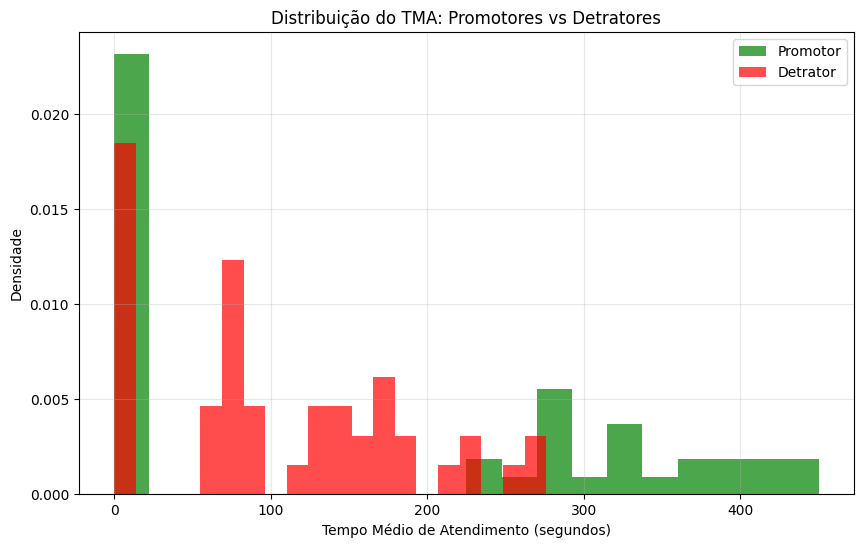

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar dados
promotores = df[df['classificacao'] == 'Promotor']['tma']
detratores = df[df['classificacao'] == 'Detrator']['tma']

# Criar histograma sobreposto
plt.figure(figsize=(10, 6))
plt.hist(promotores, bins=20, alpha=0.7, color='green', label='Promotor', density=True)
plt.hist(detratores, bins=20, alpha=0.7, color='red', label='Detrator', density=True)

plt.xlabel('Tempo Médio de Atendimento (segundos)')
plt.ylabel('Densidade')
plt.title('Distribuição do TMA: Promotores vs Detratores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

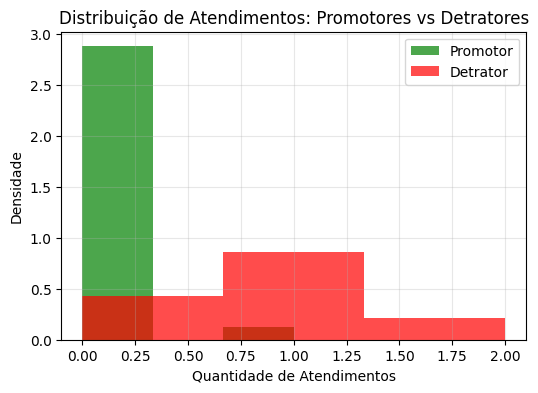

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar dados
promotores = df[df['classificacao'] == 'Promotor']['qtd_appointments']
detratores = df[df['classificacao'] == 'Detrator']['qtd_appointments']

# Criar histograma sobreposto
plt.figure(figsize=(6, 4))
plt.hist(promotores, bins=3, alpha=0.7, color='green', label='Promotor', density=True)
plt.hist(detratores, bins=3, alpha=0.7, color='red', label='Detrator', density=True)

plt.xlabel('Quantidade de Atendimentos')
plt.ylabel('Densidade')
plt.title('Distribuição de Atendimentos: Promotores vs Detratores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Alguns insights interessantes aqui:

Os promotores costumam ter atendimentos mais longos mesmo que mais raros. O que é um bom apontamento pra defender que é melhor ter um atendimento demorado, do que não resolutivo.

Outra coisa que salta aos olhos também é que os Detratores tem comumente fazem uma reclamação, mas tem uma redução drastica para para a segunda, o que pode apontar já um cliente que perdeu o interesse de fazer contatos ativos para resolver a situação com a empresa e pode em breve se tornar churn, o que reforça a importancia de contatos muito resolutivos e talvez aponte positivivamente para campanhas ativas para clientes que fizeram reclamação, em especial os que não tiveram o problema resolvido